# Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments

### 1. Abstract

The authors investigate deep reinforcement learning methods for multi-agent domains. They begin by analyzing the difficulty of traditional algorithms in the multi-agent case: Q-learning is challenged by the inherent non-stationarity of the environment, while the policy gradient suffers from a variance that increases as the number of agents increases. The authors present an adaptation of actor-critic methods that takes into account the action policies of other agents and is able to successfully learn policies that require complex multi-agent coordination. They also introduce a training mode using a set of policies for each agent, leading to more robust multi-agent policies. They show the power of their approach compared to existing methods in cooperative as well as competitive scenarios where agent populations can discover different physical and informational coordination strategies.

### Table of Contents
1. [Abstract](#1.-Abstract)
2. [Introduction](#2.-Introduction)
3. [Related Work](#3.-Related-Work)    
4. [Background](#4.-Background)
5. [Methods](#5.-Methods)
    - [5.1. Multi-Agent Actor Critic](#5.1.-Multi-Agent-Actor-Critic)
    - [5.2. Inferring Policies of Other Agents](#5.2.-Inferring-Policies-of-Other-Agents)
    - [5.3. Agents with Policy Ensembles](#5.3.-Agents-with-Policy-Ensembles)
6. [Experiments](#6.-Experiments)
    - [6.1. Environments](#6.1.-Environments)
    - [6.2. Comparison to Decentralized Reinforcement Learning Methods](#6.2.-Comparison-to-Decentralized-Reinforcement-Learning-Methods)
    - [6.3. Effect of Learning Polices of Other Agents](#6.3.-Effect-of-Learning-Polices-of-Other-Agents)
    - [6.4. Effect of Training with Policy Ensembles](#6.4.-Effect-of-Training-with-Policy-Ensembles)
7. [Conclusions and Future Work](#7.-Conclusions-and-Future-Work)
8. [Resources](#8.-Resources)

### 2. Introduction

Reinforcement learning (RL) has recently been applied to solve challenging problems, from game playing to robotics. In industrial applications, RL is emerging as a practical component in large scale systems such as data center cooling. Most of the successes of RL have been in single agent domains, where modelling or predicting the behaviour of other actors in the environment is largely unnecessary.

However, there are a number of important applications that involve interaction between multiple agents, where emergent behavior and complexity arise from agents co-evolving together. For example, multi-robot control, the discovery of communication and language, multiplayer games, and the analysis of social dilemmas all operate in a multi-agent domain. Related problems, such as variants of hierarchical reinforcement learning can also be seen as a multi-agent system, with multiple levels of hierarchy being equivalent to multiple agents. Additionally, multi-agent self-play has recently been shown to be a useful training paradigm. Successfully scaling RL to environments with multiple agents is crucial to building artificially intelligent systems that can productively interact with humans and each other.

Unfortunately, traditional reinforcement learning approaches such as Q-Learning or policy gradient are not suitable for multi-agent environments. One problem, according to the authors, is that each agent's policy changes as learning progresses and the environment becomes non-stationary from everyone's perspective individual agent (in a way that cannot be explained by changes in the agent's own policy). This presents stability of learning is challenging and prevents the direct use of repetition of past experience, which is critical for stabilizing deep Q-learning. Policy gradient methods, on the other hand, usually show very large variance when coordination of multiple agents is required. Alternatively, model-based policy optimization can be used, which can learn optimal policies by back-propagation, but this requires (differentiable) model of world dynamics and assumptions about the interactions between agents. Applying these methods in competitive environments is also an optimization challenge perspective, as evidenced by the notorious instability of competitive learning methods.

In this work, the authors of the paper propose a general-purpose multi-agent learning algorithm that: (1) results in a learned policies that use only local information (ie, their own observations) at runtime, (2) does does not assume a differentiable model of the dynamics of the environment or any particular structure of method of communication between agents and (3) is applicable not only to cooperative interaction but to competitive or mixed interaction involving both physical and communicative behavior. The the ability to operate in mixed cooperative-competitive environments may be critical for intelligent agents; while adversarial learning provides a natural curriculum for learning, agents must also perform cooperative behavior (eg with humans) during performance.

They adopt the framework of centralized learning with decentralized implementation, which allows policies to use additional information to facilitate learning, as long as that information is not used during the test. it is unnatural to do this with Q-training without making additional assumptions about the structure of the environment, since the Q-function cannot usually contain different information at training and test time. Thus, the authors propose a simple extension of actor-critic policy gradient methods, where the critic is supplemented with additional information about the policies of other agents, while the actor only has access to local information. After training is completed, only local actors are used in the implementation phase, acting in a decentralized manner and equally applicable in cooperative and competitive environments.

Since the centralized critical function explicitly uses the decision policies of other agents, the authors further show that agents can learn approximate models of other agents online and use them effectively in their own policy training procedure. The authors also introduce a method to improve the stability of multi-agent policies by training agents with an ensemble of policies, thus requiring robust interaction with different policies for collaborators and competitors. Empirically show the success of their approach compared to existing methods in cooperative as well as competitive scenarios where an agent populations are able to discover complex physical and communicative strategies for coordination.

### 3. Related Work

The simplest approach to learning in multi-agent settings is to use independent learning agents. It was done with Q-learning in, but did not perform well in practice. As we wish show that gradient methods of self-learning policies also perform poorly. One question is that each the agent's policy changes during training, which leads to a non-stationary environment and prevents naive application of trial repetition. Previous work has attempted to address this through induction other agent policy parameters to the function Q, explicitly adding the iteration index to replay buffer or use importance sampling. Deep Q-learning approaches have existed before investigated in for training competitive Pong agents.

Simultaneously with the authors' work proposed a similar idea of using policy gradient methods with a centralized critic and are test their approach on a StarCraft micromanagement task. Their (StarCraft) approach differs from the authors in the following ways: (1) they (StarCraft) learn a centralized critic for all agents, while the authors learn a centralized critique for each agent, allowing agents with different reward functions including competitive scenarios, (2) the authors also consider environments with explicit communication between agents, (3) they combine iterative policies with prior critics, while author experiments use feed-forward policies (although their methods are applicable to recurrent policies), (4) learn continuous policies, while they learn discrete policies.

Recent work has focused on learning grounded cooperative communication protocols between agents to solve various tasks. However, these methods are usually only applicable when the communication between agents is carried out over a dedicated, differentiable communication channel.

Their method requires explicit modeling of the decision-making process by other agents. The importance such modeling is recognized by both reinforcement learning and cognitive science communities emphasized the importance of being stable in the decision-making process other agents, as well as others by building Bayesian decision-making models. The authors of the article include such resiliency considerations, requiring agents to interact successfully with an ensemble of any possible policies of other agents, improving the robustness of training and the robustness of agents after training.

### 4. Background

Markov Games In this work, we consider a multi-agent extension of Markov decision processes
(MDPs) called partially observable Markov games. A Markov game for N agents is defined by a
set of states S describing the possible configurations of all agents, a set of actions $A_1$, ..., $A_N$ and
a set of observations $O_1$, ..., $O_N$ for each agent. To choose actions, each agent i uses a stochastic
policy $\pi_{θ_i}$ : $O_i \times A_i \mapsto  $, which produces the next state according to the state transition function
$T : S \times A_1 \times ... \times A_N 7 \mapsto   S^2$. Each agent i obtains rewards as a function of the state and agent’s
action $r_i: S \times A_i\mapsto   R$, and receives a private observation correlated with the state $o_i : S \mapsto   O_i$.
The initial states are determined by a distribution $ρ : S \mapsto  $ . Each agent $i$ aims to maximize its
own total expected return $\sum_{t=0}^{T} \gamma^{t} r_{i}^{t}$ where $\gamma$ is a discount factor and $T$ is the time horizon.

__Q-Learning and Deep Q-Networks (DQN)__. Q-Learning and DQN are popular methods in
reinforcement learning and have been previously applied to multi-agent settings. Q-Learning
makes use of an action-value function for policy $\pi$ as $Q^\pi (s, a) = \mathbb{E}\left [R|s^t = s,a^t = a\right ]$. This $Q$
function can be recursively rewritten as $Q^\pi (s, a) = \mathbb{E}_{\acute{s}}\left[r(s, a) +\gamma \mathbb{E}_{\acute{a}\sim \pi} \left [Q^\pi(\acute{s}, \acute{a})\right ]\right ]$. DQN learns the action-value function $Q^∗$ corresponding to the optimal policy by minimizing the loss:

$\mathcal{L}\left(\theta\right) = \mathbb{E}_{s,a,r,\acute{s}}\left[\left(Q^*\left(s,a|\theta \right)-y\right)^2\right]$, where $y = r + \gamma\max_{\acute{a}} \bar{Q}^*\left(\acute{s},\acute{a} \right)$,

where $\bar{Q}$  is a target $Q$ function whose parameters are periodically updated with the most recent $\theta$, which helps stabilize learning. Another crucial component of stabilizing DQN is the use of an experience replay buffer $\mathcal{D}$ containing tuples $s,a,r,\acute{s}$.

Q-Learning can be directly applied to multi-agent settings by having each agent $i$ learn an independently optimal function $Q_i$. However, because agents are independently updating their policies as learning progresses, the environment appears non-stationary from the view of any one agent, violating Markov assumptions required for convergence of Q-learning. Another difficulty observed in is that the experience replay buffer cannot be used in such a setting since in general,

$P\left(\acute{s}|s,a,\pi_1,...,\pi_N\right)\neq P\left(\acute{s}|s,a,\acute{\pi_1},...,\acute{\pi_N}\right)$ when any $\pi_i\neq\acute{\pi_i}$.

__Policy Gradient (PG) Algorithms.__ Policy gradient methods are another popular choice for a variety of RL tasks. The main idea is to directly adjust the parameters $\theta$ of the policy in order to maximize the objective $J\left(\theta\right) = \mathbb{E}_{s\thicksim p^\pi,a\thicksim\pi_\theta}\left[R\right]$ by taking steps in the direction of $\nabla_\theta J\left(\theta\right)$.Using the $Q$ function defined previously, the gradient of the policy can be written as:

$\nabla_\theta J\left(\theta\right) = \mathbb{E}_{s\thicksim p^\pi,a\thicksim\pi_\theta}\left[\nabla _\theta log\pi_\theta\left(a|s\right)Q^\pi\left(s,a\right)\right]$,

where $p^\pi$ is the state distribution. The policy gradient theorem has given rise to several practical algorithms, which often differ in how they estimate $Q^\pi$. For example, one can simply use a sample return $R^t = \sum_{i=t}^{T}\gamma^{i-t}r_i $, which leads to the REINFORCE algorithm. Alternatively, one could learn an approximation of the true action-value function $Q^\pi\left(s,a\right)$ by e.g. temporal-difference learning this $Q^\pi\left(s,a\right)$ is called the critic and leads to a variety of actor-critic algorithms.

Policy gradient methods are known to exhibit high variance gradient estimates. This is exacerbated in multi-agent settings; since an agent’s reward usually depends on the actions of many agents, the reward conditioned only on the agent’s own actions (when the actions of other agents are not considered in the agent’s optimization process) exhibits much more variability, thereby increasing the variance of its gradients. Below, we show a simple setting where the probability of taking a gradient step in the correct direction decreases exponentially with the number of agents.

__Proposition 1.__ _Consider $N$ agents with binary actions: $P(a_i = 1) = \theta_i$
, where $R(a_1,..., a_N ) = 1_{a_1=· · ·=a_N }$. We assume an uninformed scenario, in which agents are initialized to $\theta_i = 0.5 \forall_i$. Then,
if we are estimating the gradient of the cost $J$ with policy gradient, we have:_

$P\left(\left \langle \hat{\nabla}J,\nabla J \right \rangle>0\right)\infty\left(0.5\right)^N$

_where $\hat{\nabla}J$ $J$ is the policy gradient estimator from a single sample, and $\nabla J$ is the true gradient._

The use of baselines, such as value function baselines typically used to ameliorate high variance, is problematic in multi-agent settings due to the non-stationarity issues mentioned previously.

__Deterministic Policy Gradient (DPG) Algorithms.__ It is also possible to extend the policy gradient framework to deterministic policies $\mu_\theta : S \mapsto A$.In particular, under certain conditions we can write the gradient of the objective $J\left(\theta\right)=\mathbb{E}_{s\sim p^\mu}\left[R\left(s,a\right)\right]$ as:

$\nabla_\theta J\left(\theta\right ) = \mathbb{E}_{s\sim \mathcal{D}}\left[ \nabla_ \theta \mu_\theta \left(a|s\right)\nabla_a Q^\mu\left(s,a\right)|_{a=\mu_\theta\left(s\right)}\right]$

Since this theorem relies on $\nabla_a Q^\mu\left(s,a\right)$, it requires that the action space $A$ (and thus the policy $\mu$)be continuous.

_Deep deterministic policy gradient_ (DDPG) is a variant of DPG where the policy $\mu$ and critic $Q^\mu$ are approximated with deep neural networks. DDPG is an off-policy algorithm, and samples trajectories from a replay buffer of experiences that are stored throughout training. DDPG also makes use of a target network, as in DQN .


### 5. Methods

#### 5.1. Multi-Agent Actor Critic

The authors of the previous section argued that naively policy gradient methods perform poorly in simple multi-agent settings and this is supported in the author's experiments in this section. Their purpose in this section is to derive an algorithm that works well in such settings. However, they want to work under the following constraints: (1) learned policies can only use local information (ie, their own observations) at runtime, (2) they do not accept differentiable environment dynamics model, and (3) do not adopt any particular structure the method of communication between agents (i.e. they do not accept differentiable communication channel). Meeting the above requirements would provide general purpose multi-agent training algorithm that can be applied not only to cooperative games with explicit communication channels, but competitive games and games involving only physical interactions between agents.

The authors achieved their goal by adopting the framework of centralized learning with decentralized execution. Thus, they allowed policies to use additional information to facilitate learning, so until this information is used during the test. It is unnatural to do this with Q-learning because Q the function cannot normally contain different information during training and test. That's what they offer a simple extension of the actor-critic policy gradient methods where the critic is reinforced with additional information about the policies of other agents.

More concretely, consider a game with $N$ agents with policies parameterized by $\theta = \{\theta_1,...,\theta_N\}$, and let $\pi = \{\pi_1,...,\pi_N\}$be the set of all agent policies. Then we can write the gradient of the expected return for agent $i,J\left(\theta_i\right)=\mathbb{E}\left[R_i\right]$ as:

$\nabla_\theta J\left(\theta_i\right) = \mathbb{E}_{s\thicksim p^\mu,a_i\thicksim\pi_i}\left[\nabla _{\theta_i} log\pi_i\left(a_i|o_i\right)Q_i^\pi\left(x,a_1,...,a_N\right)\right]$

[Source: ](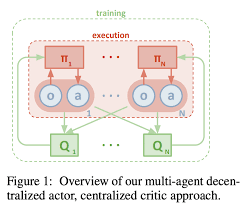)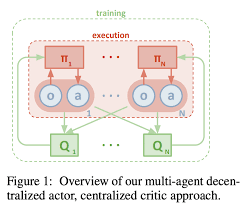

Here $Q_i^\pi\left(x,a_1,...,a_N\right)$ is a _centralized action-value function_ that takes as input the actions of all agents,$\left(x,a_1,...,a_N\right)$, in addition to some state information $x$ could consist of the observations of all agents, $x = \left(o_1,...,o_N\right)$, however we could also include additional state information if available. Since each $Q_i^\pi$ is learned separately, agents can have arbitrary reward structures, including conflicting rewards in a competitive setting. 

Extend the above idea to work with deterministic policies. If we now consider $N$ continuous
policies $\mu_{\theta_i}$ w.r.t. parameters $\theta_i$ (abbreviated as $\mu_i$), the gradient can be written as:

$\nabla_\theta J\left(\mu_i\right) = \mathbb{E}_{x,a \thicksim \mathcal{D}}\left[\nabla_{\theta_i}\mu_i\left(a_i|o_i\right)\nabla_{a_i}Q^\mu_i\left(x,a_1,...,a_N\right)|_{a_i=\mu_i\left(o_i\right)}\right],$

Here the experience replay buffer $\mathcal{D}$ contains the tuples $\left(x,a_1,...,a_N,r_1,...,r_N\right)$,  recording
experiences of all agents. The centralized action-value function $Q^\mu_i$ is updated as:

$\mathcal{L}\left(\theta_i\right) = \mathbb{E}_{x,a,r,\acute{x}}\left[\left(Q^\mu_i\left(x,a_1,...,a_N\right)-y\right)^2\right],$, where 
$y = r_i + \gamma Q^{\acute{\mu}}_i\left(\acute{x},\acute{a_1},...,\acute{a_N} \right)|_{\acute{a_j}=\acute{\mu_i}\left(o_j\right)^,}$

where $\acute{\mu} = \{\mu_\acute{\theta_1},...,\mu_\acute{\theta_N}\}$ is the set of target policies with delayed parameters $\acute{\theta_i}$. We find the centralized critic with deterministic policies works very well in practice, and refer to it as _multi-agent deep deterministic policy gradient_ (MADDPG). We provide the description of the full algorithm in the Appendix.

A primary motivation behind MADDPG is that, if we know the actions taken by all agents, the
environment is stationary even as the policies change, since $P\left(\acute{s}|s,a_1,...,a_N,\pi_1,...,\pi_N\right) = P\left(\acute{s}|s,a_1,...,a_N \right) = P\left(\acute{s}|s,a_1,...,a_N,\acute{\pi_1},...,\acute{\pi_N}\right)$ for any $\pi_i \neq \acute{\pi_i}$. This is not the case if we do not explicitly condition on the actions of other agents, as done for most traditional RL methods.

#### 5.2. Inferring Policies of Other Agents

To remove the assumption of knowing other agents $^,$’ policies each agent $i$ can additionally maintain an approximation $\hat{\mu}_{\phi_i^j}$ (where $\phi$ are the parameters of the approximation; henceforth $\hat{\mu}_i^j$) to the true policy of agent $j,\mu_j$. This approximate policy is learned by maximizing the log probability of agent $j^,$s actions, with an entropy regularizer:

$\mathcal{L}\left(\phi_i^j\right) = -\mathbb{E}_{o_j,a_j}\left[log\hat{\mu}_i^j\left(a_j|o_j\right)+\lambda H\hat{\mu}_i^j\right],$

where $H$ is the entropy of the policy distribution. With the approximate policies,$y$ can be
replaced by an approximate value $\hat{y}$ calculated as follows:

$\hat{y}=r_i+\gamma Q^\hat{\mu}_i\left(x^\prime,\hat{\mu}^{\prime1}_i\left(o_1\right),...,\mu^\prime_i\left(o_i\right),...,\hat{\mu}^{\prime N}_i\left(o_N\right)\right),$

where $\hat{\mu}^{\prime j}_i$ denotes the target network for the approximate policy$\hat{\mu}^{j}_i$  can be optimized in a completely online fashion: before updating $Q^\mu_i$, the centralized $Q$ function, we take the latest samples of each agent $j$ from the replay buffer to perform a single gradient step to update $\phi^j_i$. Note also that, in the above equation, we input the action log probabilities of each agent directly into $Q$, rather than sampling.

#### 5.3. Agents with Policy Ensembles

As previously mentioned, a recurring problem in multi-agent reinforcement learning is the environment non-stationarity due to the agents’ changing policies. This is particularly true in competitive settings, where agents can derive a strong policy by overfitting to the behavior of their competitors.Such policies are undesirable as they are brittle and may fail when the competitors alter strategies.

To obtain multi-agent policies that are more robust to changes in the policy of competing agents, we propose to train a collection of $K$ different sub-policies. At each episode, we randomly select
one particular sub-policy for each agent to execute. Suppose that policy $\mu_i$ i
is an ensemble of $K$ different sub-policies with sub-policy $k$ denoted by $\mu_{\theta^{\left(k\right)}_i}$ (denoted as $\mu^\left(k\right)_i$). For agen $i$,we are then
maximizing the ensemble objective: $J_e\left(\mu_i\right) = \mathbb{E}_{k\thicksim unif\left(1,K\right),s\thicksim p^\mu,a\thicksim \mu^\left(k\right)_i}\left[R_i\left(s,a\right)\right]$

Since different sub-policies will be executed in different episodes, we maintain a replay buffer $\mathcal{D}^{\left(k \right)}_i$ for each sub-policy $\mu^{\left(k \right)}_i$ of agent $i$ Accordingly, we can derive the gradient of the ensemble objective
with respect to $\theta^{\left(k \right)}_i$ as follows:

$\nabla_\theta{^{\left(k \right)}_i}J_e\left(\mu_i\right)=\frac{1}{K}\mathbb{E}_{x,a \thicksim}\mathcal{D}^{\left(k \right)}_i\left[\nabla_\theta{^{\left(k \right)}_i} \mu^{\left(k \right)}_i\left(a_i|o_i\right)\nabla_{a_i}Q^{\mu_i}\left(x,a_1,...,a_N\right)|_{a_i=\mu^{\left(k \right)}_i}\left(o_i\right)\right]$

### 6. Experiments

#### 6.1. Environments

We accept the grounded communication medium, which consists of $N$ agents and $L$ landmarks inhabiting a two-dimensional world with a continuous
space and discrete time. Agents can take physical actions in the environment and communication
actions that are broadcast to other agents. we do not assume that all agents have
identical spaces of action and observation, or act according to the same policy $\pi$. We also consider
games that are both cooperative (all agents must maximize total return) and competitive (agents
have conflicting goals). Some environments require explicit communication between agents in a queue
to achieve the best reward, while in other environments agents can only perform physical actions. We
give details of each environment below.

[Source: ](https://image.slidesharecdn.com/201208-maddpg-210423153651/85/multi-ppt-agent-actorcritic-for-mixed-cooperativecompetitive-environments-27-320.jpg?cb=1668205757)![](https://image.slidesharecdn.com/201208-maddpg-210423153651/85/multi-ppt-agent-actorcritic-for-mixed-cooperativecompetitive-environments-27-320.jpg?cb=1668205757)

__Cooperative communication.__ This task consists of two cooperative agents, a speaker and a listener, who are placed in an environment with three landmarks of differing colors. At each episode, the listener must navigate to a landmark of a particular color, and obtains reward based on its distance to the correct landmark. However, while the listener can observe the relative position and color of the landmarks, it does not know which landmark it must navigate to. Conversely, the speaker’s observation consists of the correct landmark color, and it can produce a communication output at each time step which is observed by the listener. Thus, the speaker must learn to output the landmark colour based on the motions of the listener.

__Cooperative navigation.__ In this environment, agents must cooperate through physical actions to reach a set of L landmarks. Agents observe the relative positions of other agents and landmarks, and are collectively rewarded based on the proximity of any agent to each landmark. In other words, the agents have to ‘cover’ all of the landmarks. Further, the agents occupy significant physical space and are penalized when colliding with each other. Our agents learn to infer the landmark they must cover, and move there while avoiding other agents.

__Keep-away.__ This scenario consists of $L$ landmarks including a target landmark, $N$ cooperating agents who know the target landmark and are rewarded based on their distance to the target, and $M$ adversarial agents who must prevent the cooperating agents from reaching the target. Adversaries accomplish this by physically pushing the agents away from the landmark, temporarily occupying it. While the adversaries are also rewarded based on their distance to the target landmark, they do not know the correct target; this must be inferred from the movements of the agents.

[Source: ](https://image.slidesharecdn.com/201208-maddpg-210423153651/85/multi-ppt-agent-actorcritic-for-mixed-cooperativecompetitive-environments-30-320.jpg?cb=1668205757)![](https://image.slidesharecdn.com/201208-maddpg-210423153651/85/multi-ppt-agent-actorcritic-for-mixed-cooperativecompetitive-environments-30-320.jpg?cb=1668205757)

__Physical deception.__ Here, $N$ agents cooperate to reach a single target landmark from a total of $N$ landmarks. They are rewarded based on the minimum distance of any agent to the target (so only one agent needs to reach the target landmark). However, a lone adversary also desires to reach the target landmark; the catch is that the adversary does not know which of the landmarks is the correct one. Thus the cooperating agents, who are penalized based on the adversary distance to the target, learn to spread out and cover all landmarks so as to deceive the adversary.

__Predator-prey.__ In this variant of the classic predator-prey game, N slower cooperating agents must chase the faster adversary around a randomly generated environment with L large landmarks impeding the way. Each time the cooperative agents collide with an adversary, the agents are rewarded while the adversary is penalized. Agents observe the relative positions and velocities of the agents, and the positions of the landmarks.

__Covert communication.__ This is an adversarial communication environment, where a speaker agent (‘Alice’) must communicate a message to a listener agent (‘Bob’), who must reconstruct the message at the other end. However, an adversarial agent (‘Eve’) is also observing the channel, and wants to reconstruct the message — Alice and Bob are penalized based on Eve’s reconstruction, and thus Alice must encode her message using a randomly generated key, known only to Alice and Bob. This is similar to the cryptography environment.

#### 6.2. Comparison to Decentralized Reinforcement Learning Methods

We implement our MADDPG algorithm and
evaluate it on the environments presented.Unless otherwise specified, our
policies are parameterized by a two-layer ReLU
MLP with 64 units per layer. The messages
sent between agents are soft approximations to
discrete messages, calculated using the GumbelSoftmax estimator. To evaluate the quality
of policies learned in competitive settings, we
pitch MADDPG agents against DDPG agents,
and compare the resulting success of the agents
and adversaries in the environment. We train
our models until convergence, and then evaluate
them by averaging various metrics for 1000 further iterations. We provide the tables and details
of our results on all environments in the Appendix, and summarize them here.

[Source: ](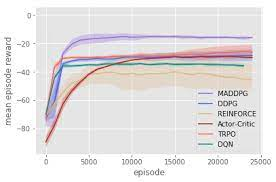)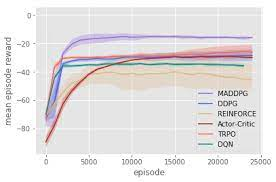

First examine the cooperative communication scenario. Despite the simplicity of the task (the
speaker only needs to learn to output its observation), traditional RL methods such as DQN, Actor-Critic, a first-order implementation of TRPO, and DDPG all fail to learn the correct behaviour
(measured by whether the listener is within a short distance from the target landmark). In practice we
observed that the listener learns to ignore the speaker and simply moves to the middle of all observed
landmarks. plot the learning curves over 25000 episodes for various approaches.

hypothesize that a primary reason for the failure of traditional RL methods in this (and other)
multi-agent settings is the lack of a consistent gradient signal. For example, if the speaker utters
the correct symbol while the listener moves in the wrong direction, the speaker is penalized. This
problem is exacerbated as the number of time steps grows: we observed that traditional policy
gradient methods can learn when the objective of the listener is simply to reconstruct the observation
of the speaker in a single time step, or if the initial positions of agents and landmarks are fixed and
evenly distributed. This indicates that many of the multi-agent methods previously proposed for
scenarios with short time horizons may not generalize to more complex tasks.

Conversely, MADDPG agents can learn coordinated behaviour more easily via the centralized
critic. In the cooperative communication environment, MADDPG is able to reliably learn
the correct listener and speaker policies, and
the listener is often (84.0% of the time) able to
navigate to the target.

A similar situation arises for the physical deception task: when the cooperating agents are
trained with MADDPG, they are able to successfully deceive the adversary by covering all of the
landmarks around 94% of the time when $L = 2$
(Figure 5). Furthermore, the adversary success
is quite low, especially when the adversary is
trained with DDPG (16.4% when $L = 2$). This
contrasts sharply with the behaviour learned by
the cooperating DDPG agents, who are unable to deceive MADDPG adversaries in any scenario, and
do not even deceive other DDPG agents when $L = 4$.

While the cooperative navigation and predator-prey tasks have a less stark divide between success and
failure, in both cases the MADDPG agents outperform the DDPG agents. In cooperative navigation,
MADDPG agents have a slightly smaller average distance to each landmark, but have almost half the average number of collisions per episode (when $N = 2$) compared to DDPG agents due to the ease
of coordination. Similarly, MADDPG predators are far more successful at chasing DDPG prey (16.1
collisions/episode) than the converse (10.3 collisions/episode).

In the covert communication environment, we found that Bob trained with both MADDPG and
DDPG out-performs Eve in terms of reconstructing Alice’s message. However, Bob trained with
MADDPG achieves a larger relative success rate compared with DDPG (52.4% to 25.1%). Further,
only Alice trained with MADDPG can encode her message such that Eve achieves near-random
reconstruction accuracy. The learning curve (a sample plot is shown in Appendix) shows that the
oscillation due to the competitive nature of the environment often cannot be overcome with common
decentralized RL methods. We emphasize that we do not use any of the tricks required for the
cryptography environment, including modifying Eve’s loss function, alternating agent and
adversary training, and using a hybrid ‘mix & transform’ feed-forward and convolutional architecture.

#### 6.3. Effect of Learning Polices of Other Agents

The authors evaluate the effectiveness of learning the policies of other agents in the cooperative communication
environment, following the same hyperparameters as the previous experiments and setting $λ = 0.001$. They observe that despite not fitting the policies of other
agents perfectly (in particular, the approximate listener policy learned by the speaker has a fairly
large KL divergence to the true policy), learning with approximated policies is able to achieve the
same success rate as using the true policy, without a significant slowdown in convergence.

#### 6.4. Effect of Training with Policy Ensembles

the authors focus on the effectiveness of policy ensembles in competitive environments, including keep-away,
cooperative navigation, and predator-prey. They choose $K = 3$ sub-policies for the keep-away and
cooperative navigation environments, and $K = 2$ for predator-prey. To improve convergence speed,
They enforce that the cooperative agents should have the same policies at each episode, and similarly
for the adversaries. To evaluate the approach, they measure the performance of ensemble policies
and single policies in the roles of both agent and adversary. The results are shown on the right side. They observe that agents with policy ensembles are stronger than those with a single
policy. In particular, when pitting ensemble agents against single policy adversaries (second to left
bar cluster), the ensemble agents outperform the adversaries by a large margin compared to when the
roles are reversed (third to left bar cluster).

### 7. Conclusions and Future Work

The creators of this article have proposed a multi-agent policy gradient algorithm where agents learn a centralized critic
based on the observations and actions of all agents. Empirically, our method outperforms traditional
RL algorithms on a variety of cooperative and competitive multi-agent environments. They can further improve the performance of their method by training agents with an ensemble of policies, an approach
they believe to be generally applicable to any multi-agent algorithm.

One downside to their approach is that the input space of Q grows linearly (depending on what
information is contained in x) with the number of agents N. This could be remedied in practice by,
for example, having a modular Q function that only considers agents in a certain neighborhood of a
given agent. They leave this investigation to future work.

In [ ]:
import gymnasium as gym
from ray.rllib.algorithms.ppo import PPOConfig


# Define your problem using python and openAI's gym API:
class ParrotEnv(gym.Env):
    """Environment in which an agent must learn to repeat the seen observations.

    Observations are float numbers indicating the to-be-repeated values,
    e.g. -1.0, 5.1, or 3.2.

    The action space is always the same as the observation space.

    Rewards are r=-abs(observation - action), for all steps.
    """

    def __init__(self, config):
        # Make the space (for actions and observations) configurable.
        self.action_space = config.get(
            "parrot_shriek_range", gym.spaces.Box(-1.0, 1.0, shape=(1, )))
        # Since actions should repeat observations, their spaces must be the
        # same.
        self.observation_space = self.action_space
        self.cur_obs = None
        self.episode_len = 0

    def reset(self, *, seed=None, options=None):
        """Resets the episode and returns the initial observation of the new one.
        """
        # Reset the episode len.
        self.episode_len = 0
        # Sample a random number from our observation space.
        self.cur_obs = self.observation_space.sample()
        # Return initial observation.
        return self.cur_obs, {}

    def step(self, action):
        """Takes a single step in the episode given `action`

        Returns:
            New observation, reward, done-flag, info-dict (empty).
        """
        # Set `truncated` flag after 10 steps.
        self.episode_len += 1
        terminated = False
        truncated = self.episode_len >= 10
        # r = -abs(obs - action)
        reward = -sum(abs(self.cur_obs - action))
        # Set a new observation (random sample).
        self.cur_obs = self.observation_space.sample()
        return self.cur_obs, reward, terminated, truncated, {}


# Create an RLlib Algorithm instance from a PPOConfig to learn how to
# act in the above environment.
config = (
    PPOConfig()
    .environment(
        # Env class to use (here: our gym.Env sub-class from above).
        env=ParrotEnv,
        # Config dict to be passed to our custom env's constructor.
        env_config={
            "parrot_shriek_range": gym.spaces.Box(-5.0, 5.0, (1, ))
        },
    )
    # Parallelize environment rollouts.
    .rollouts(num_rollout_workers=3)
)
# Use the config's `build()` method to construct a PPO object.
algo = config.build()

# Train for n iterations and report results (mean episode rewards).
# Since we have to guess 10 times and the optimal reward is 0.0
# (exact match between observation and action value),
# we can expect to reach an optimal episode reward of 0.0.
for i in range(5):
    results = algo.train()
    print(f"Iter: {i}; avg. reward={results['episode_reward_mean']}")

In [ ]:
# Perform inference (action computations) based on given env observations.
# Note that we are using a slightly simpler env here (-3.0 to 3.0, instead
# of -5.0 to 5.0!), however, this should still work as the agent has
# (hopefully) learned to "just always repeat the observation!".
env = ParrotEnv({"parrot_shriek_range": gym.spaces.Box(-3.0, 3.0, (1, ))})
# Get the initial observation (some value between -10.0 and 10.0).
obs, info = env.reset()
terminated = truncated = False
total_reward = 0.0
# Play one episode.
while not terminated and not truncated:
    # Compute a single action, given the current observation
    # from the environment.
    action = algo.compute_single_action(obs)
    # Apply the computed action in the environment.
    obs, reward, terminated, truncated, info = env.step(action)
    # Sum up rewards for reporting purposes.
    total_reward += reward
# Report results.
print(f"Shreaked for 1 episode; total-reward={total_reward}")

### 8. Resources

[Article](https://arxiv.org/pdf/1706.02275v4.pdf)

[Code](https://github.com/ray-project/ray/tree/master/rllib)